# satellite image objects
* hierarchical class built structures:
    1. Buildings - large building, residential, non-residential, fuel storage facility, fortified building
    2. Misc. Manmade structures
* hierarchical class pathways:
    3. Road 
    4. Track - poor/dirt/cart track, footpath/trail
* hierarchical class vegetation:
    5. Trees - woodland, hedgerows, groups of trees, standalone trees
    6. Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
* hierarchical class water: 
    7. Waterway 
    8. Standing water

In [75]:
# data downloaded using Kaggle-CLI
ll -h '/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/train_geojson_v3'

total 100K
drwx------ 2 adrian 4,0K  6 dec  2016 6010_1_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6010_4_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6010_4_4/
drwx------ 2 adrian 4,0K  6 dec  2016 6040_1_0/
drwx------ 2 adrian 4,0K  6 dec  2016 6040_1_3/
drwx------ 2 adrian 4,0K  6 dec  2016 6040_2_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6040_4_4/
drwx------ 2 adrian 4,0K  6 dec  2016 6060_2_3/
drwx------ 2 adrian 4,0K  6 dec  2016 6070_2_3/
drwx------ 2 adrian 4,0K  6 dec  2016 6090_2_0/
drwx------ 2 adrian 4,0K  6 dec  2016 6100_1_3/
drwx------ 2 adrian 4,0K  6 dec  2016 6100_2_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6100_2_3/
drwx------ 2 adrian 4,0K  6 dec  2016 6110_1_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6110_3_1/
drwx------ 2 adrian 4,0K  6 dec  2016 6110_4_0/
drwx------ 2 adrian 4,0K  6 dec  2016 6120_2_0/
drwx------ 2 adrian 4,0K  6 dec  2016 6120_2_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6140_1_2/
drwx------ 2 adrian 4,0K  6 dec  2016 6140_3_1/
drwx------ 2 adrian 4,0K  6 d

## Dataset

In [3]:
import sys
sys.path.append('../')

from importlib import reload

%load_ext autoreload
%autoreload 2

In [4]:
import sentinel.data
reload(sentinel.data)
from sentinel.data import load_dataset

# hard-coded: DATA_PATH = '/mnt/data/sentinel/dstl-satellite-imagery-feature-detection'
%time sentinel_df = load_dataset()

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed | 28.5s


/home/adrian/.pyenv/versions/miniconda3-latest/envs/sentinel/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


CPU times: user 2min 35s, sys: 0 ns, total: 2min 35s
Wall time: 2min 36s


# observe dataframe information

5
[0 1 2 3 4]


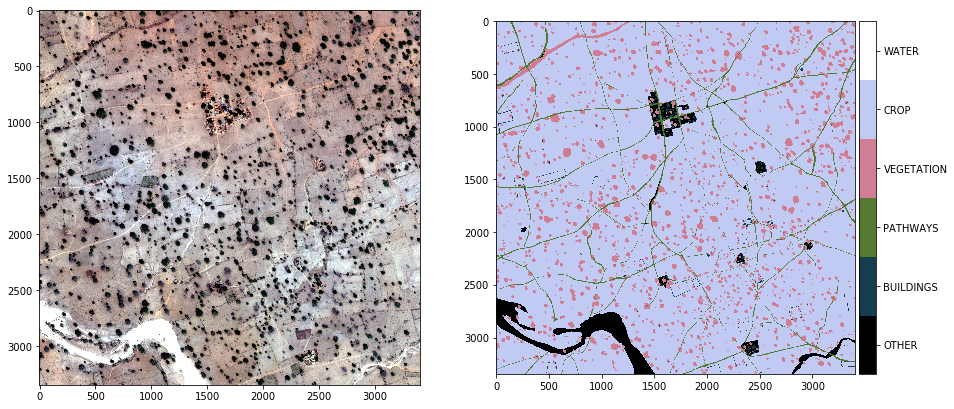

In [200]:
import numpy as np
from shapely.geometry import MultiPolygon, Polygon
import shapely.affinity
import sentinel.data.write
reload(sentinel.data.write)
from sentinel.data.write import process_classes, read_image, stretch_8bit, HIERARCHIES, scale_to_mask, LABEL_RANGE

df_row = sentinel_df[sentinel_df.image_id == '6060_2_3']
image = stretch_8bit(read_image(df_row.image_id.values[0], 'three_band/{}.tif'))
mask = process_classes(image.shape[:2], df_row)
print(np.unique(mask))

import sentinel.visualization
reload(sentinel.visualization)
from sentinel.visualization import discrete_cmap, colorbar
import matplotlib.pyplot as plt
%matplotlib inline

labels = HIERARCHIES
# labels = LABEL_COLUMNS[::-1]
N = len(labels)
ticks = range(N)

cmap = discrete_cmap(N, 'cubehelix')
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[15, 10])
ax0.imshow(image)
img1 = ax1.imshow(mask, interpolation='nearest', cmap=cmap)
colorbar(img1, ticks=ticks, labels=labels)

# write dataset into TF records 

In [217]:
rm -rf /mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/*

In [218]:
import sentinel.data
reload(sentinel.data)
from sentinel.data import save

for i, df_row in sentinel_df.iterrows():
    save(df_row, save_folder='tfrecords', num_rows=2, num_cols=2, use_sparse=False)

3
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-1-2-part-1.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-1-2-part-2.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-1-2-part-3.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-1-2-part-4.tfrecord
2
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-4-2-part-1.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-4-2-part-2.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-4-2-part-3.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-4-2-part-4.tfrecord
1
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-4-4-part-1.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-feature-detection/tfrecords/6010-4-4-part-2.tfrecord
/mnt/data/sentinel/dstl-satellite-imagery-fe